In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [5]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"


# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID", how='left')

# Display the data table for preview, axis='columns'
combined_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_mean = combined_data.groupby(['Drug','Timepoint'], as_index=False).agg({"Tumor Volume (mm3)": "mean"})

# Convert to DataFrame
tumor_response = pd.DataFrame(tumor_response_mean)

# Preview DataFrame
tumor_response.head(11)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_sem = (combined_data.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"]).sem()

# Convert to DataFrame
tumor_response2 = pd.DataFrame(tumor_response_sem)

# Preview DataFrame
tumor_response2.head(5)
                # Need to find a way to show index and list drug for each index 

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_mean_reformat = tumor_response_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
tumor_response_mean_reformat.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


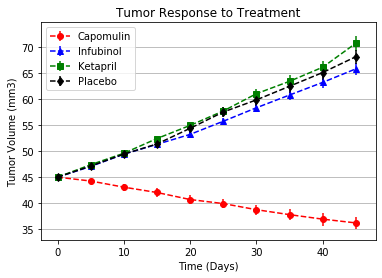

In [10]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
x_axis = np.arange(0, max(tumor_response_mean["Timepoint"])+2, 5)

plt.errorbar(x_axis, tumor_response_mean_reformat['Capomulin'], yerr=tumor_response_sem['Capomulin'], linestyle= "--", color="red", fmt="o", label="Capomulin")
plt.errorbar(x_axis, tumor_response_mean_reformat['Infubinol'], yerr=tumor_response_sem['Infubinol'], linestyle= "--", color="blue", fmt="^", label="Infubinol")
plt.errorbar(x_axis, tumor_response_mean_reformat['Ketapril'], yerr=tumor_response_sem['Ketapril'], linestyle= "--", color="green", fmt="s", label="Ketapril")
plt.errorbar(x_axis, tumor_response_mean_reformat['Placebo'], yerr=tumor_response_sem['Placebo'], linestyle= "--", color="black", fmt="d", label="Placebo")

ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

ax.set_xlim(-2.5, max(tumor_response["Timepoint"])+3)
ax.set_ylim(33, max(tumor_response["Tumor Volume (mm3)"])+4)

plt.legend(loc="upper left")
plt.grid(axis='y')

# Save the Figure
plt.savefig("../Images/Homework Images/tumor response line graph.png")

# Show the Figure
plt.show()
                    # Move the plot to the middle of the screen 

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastat_response_mean = combined_data.groupby(['Drug','Timepoint']).agg({"Metastatic Sites": "mean"})

# Convert to DataFrame
metastat_response = pd.DataFrame(metastat_response_mean)

# Preview DataFrame
#dfStyler = metastat_response_mean.style.set_properties(**{'text-align': 'center'})
#dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
metastat_response.head(5)
                     # Find a way to position the Drug label in the center 

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastat_response_sem = combined_data.groupby(['Drug','Timepoint'])["Metastatic Sites"].sem()

# Convert to DataFrame
metastat_response2 = pd.DataFrame(metastat_response_sem)

# Preview DataFrame
metastat_response2.head(5)
                      # Find a way to position the Drug label in the center 

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
# Minor Data Munging to Re-Format the Data Frames
metastat_response_mean2 = combined_data.groupby(['Drug','Timepoint'], as_index=False).agg({"Metastatic Sites": "mean"})
metastat_response_mean_reformat = metastat_response_mean2.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
metastat_response_mean_reformat.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


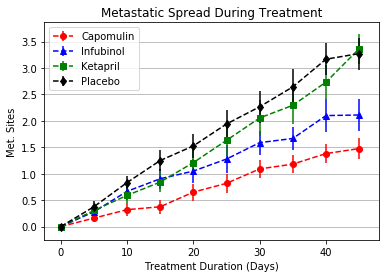

In [14]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
x_axis = np.arange(0, max(metastat_response_mean2["Timepoint"])+2, 5)

plt.errorbar(x_axis, metastat_response_mean_reformat['Capomulin'], yerr=metastat_response_sem['Capomulin'], linestyle= "--", color="red", fmt="o", label="Capomulin")
plt.errorbar(x_axis, metastat_response_mean_reformat['Infubinol'], yerr=metastat_response_sem['Infubinol'], linestyle= "--", color="blue", fmt="^", label="Infubinol")
plt.errorbar(x_axis, metastat_response_mean_reformat['Ketapril'], yerr=metastat_response_sem['Ketapril'], linestyle= "--", color="green", fmt="s", label="Ketapril")
plt.errorbar(x_axis, metastat_response_mean_reformat['Placebo'], yerr=metastat_response_sem['Placebo'], linestyle= "--", color="black", fmt="d", label="Placebo")

ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")

ax.set_xlim(-2.5, max(metastat_response_mean2["Timepoint"])+3)
ax.set_ylim(-0.25, max(metastat_response_mean2["Metastatic Sites"])+0.5)

plt.legend(loc="upper left")
plt.grid(axis='y')

# Save the Figure
plt.savefig("../Images/Homework Images/metastatic spread line graph.png")

# Show the Figure
plt.show()
                           # Move the plot to the middle of the screen 

## Survival Rates

In [15]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate_mean = combined_data.groupby(['Drug','Timepoint'], as_index=False)["Mouse ID"].count()
survival_rate_mean = survival_rate_mean.rename(columns={'Mouse ID': 'Mouse Count'})

# Convert to DataFrame
survival_rate = pd.DataFrame(survival_rate_mean)

# Preview DataFrame
survival_rate.head(5)

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [16]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_mean_reformat = survival_rate.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview that Reformatting worked
survival_rate_mean_reformat.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


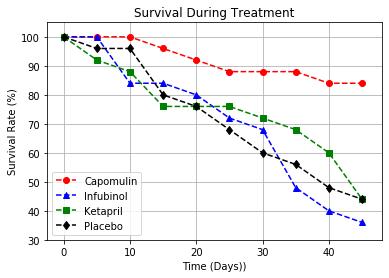

In [17]:
# Calcuate the survival percentage 
cap_sur = [x/max(survival_rate_mean_reformat['Capomulin'])*100 for x in survival_rate_mean_reformat['Capomulin']]
inf_sur = [x/max(survival_rate_mean_reformat['Infubinol'])*100 for x in survival_rate_mean_reformat['Infubinol']]
keta_sur = [x/max(survival_rate_mean_reformat['Ketapril'])*100 for x in survival_rate_mean_reformat['Ketapril']]
pla_sur = [x/max(survival_rate_mean_reformat['Placebo'])*100 for x in survival_rate_mean_reformat['Placebo']]

# Generate the Plot (Accounting for percentages)
x_axis = np.arange(0, max(survival_rate["Timepoint"])+2, 5)

capomulin_survival , = plt.plot(x_axis, cap_sur, color="red", marker="o", linestyle= "--", label="Capomulin")
infubinol_survival , = plt.plot(x_axis, inf_sur, color="blue", marker="^", linestyle= "--", label="Infubinol")
ketapril_survival , = plt.plot(x_axis, keta_sur, color="green", marker="s", linestyle= "--", label="Ketapril")
placebo_survival , = plt.plot(x_axis, pla_sur, color="black", marker="d", linestyle= "--", label="Placebo")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days))")
plt.ylabel("Survival Rate (%)")

plt.xlim(-2.5, max(survival_rate["Timepoint"])+3)
plt.ylim(30, 105)

plt.legend(loc="bottom left")
plt.grid()

# Save the Figure
plt.savefig("../Images/Homework Images/survival line graph.png")

# Show the Figure
plt.show()
                           # Move the plot to the middle of the screen 

In [121]:
mant = combined_data.groupby("Drug")
mant['Tumor Volume (mm3)'].range()

AttributeError: 'SeriesGroupBy' object has no attribute 'range'

## Summary Bar Graph

In [155]:
# Calculate the percent changes for each drug
dr = []
  
for drug in tumor_response_mean_reformat.columns.values:
    dr.append((tumor_response_mean_reformat.loc[45,[drug]] - tumor_response_mean_reformat.loc[0,[drug]]) / tumor_response_mean_reformat.loc[0,[drug]] * 100 )

#capomulin_change = (tumor_response_mean_reformat.loc[45,['Capomulin']] - tumor_response_mean_reformat.loc[0,['Capomulin']])/ tumor_response_mean_reformat.loc[0,['Capomulin']]*100
#infubinol_change = (tumor_response_mean_reformat.loc[45,['Infubinol']] - tumor_response_mean_reformat.loc[0,['Infubinol']])/ tumor_response_mean_reformat.loc[0,['Infubinol']]*100
#ketapril_change = (tumor_response_mean_reformat.loc[45,['Ketapril']] - tumor_response_mean_reformat.loc[0,['Ketapril']])/ tumor_response_mean_reformat.loc[0,['Ketapril']]*100
#placebo_change = (tumor_response_mean_reformat.loc[45,['Placebo']] - tumor_response_mean_reformat.loc[0,['Placebo']])/ tumor_response_mean_reformat.loc[0,['Placebo']]*100
    
    
# Display the data to confirm
dr

[Drug
 Capomulin   -19.475303
 dtype: float64, Drug
 Ceftamin    42.516492
 dtype: float64, Drug
 Infubinol    46.123472
 dtype: float64, Drug
 Ketapril    57.028795
 dtype: float64, Drug
 Naftisol    53.923347
 dtype: float64, Drug
 Placebo    51.29796
 dtype: float64, Drug
 Propriva    47.241175
 dtype: float64, Drug
 Ramicane   -22.3209
 dtype: float64, Drug
 Stelasyn    52.085134
 dtype: float64, Drug
 Zoniferol    46.579751
 dtype: float64]

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)